# Results checklist
| Datasets | Domain | Model | Completed |
|----------|--------|-------|-----------|
|Cifar10   |Base    |RS34   |           |
|          |        |MBv3   |           |
|          |        |ViT-B  |           |
|          |Multi   |RS34   |Done       |
|          |        |MBv3   |           |
|          |        |ViT-B  |           |
|Cifar100  |Base    |RS34   |Done       |
|          |        |MBv3   |           |
|          |        |ViT-B  |           |
|          |Multi   |RS34   |Done       |
|          |        |MBv3   |pretraining|
|          |        |ViT-B  |Progress   |

Testing to find corrolation between a bunch of cifar10 results

# Cifar10 - Multi - RS34

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("wandb_export.csv")
data = data[["num_epochs_pre", "gen_data", "real_data", "test_acc"]]

print("Corrolation of each variable with regards to test accuracy")
data.corr()["test_acc"][0:-1]


Corrolation of each variable with regards to test accuracy


num_epochs_pre    0.101004
gen_data          0.268928
real_data         0.779011
Name: test_acc, dtype: float64

The amount of real data appears to be the most important variable for perforamance

Plot the data

In [39]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

real_datas = data["real_data"].unique()
num_epochs_pre = data["num_epochs_pre"].unique()
num_epochs_pre = -np.sort(-num_epochs_pre)
real_datas.sort()

fig, ax = plt.subplots(1, 5, sharey=True, )
fig.set_figheight(5)
fig.set_figwidth(22)
# fig.tight_layout()

loc = [[0,0], [0,1], [1,0], [1,1]]
baselines = [0.3515, 0.5128, 0.5872, 0.6785, 0.7972]

for x, real in enumerate(real_datas):
    for epoch in num_epochs_pre:
        if np.isnan(epoch):
            continue
        _data = data[(data["real_data"] == real) & (data["num_epochs_pre"] == epoch)]
        
        # _data = pd.concat([_base, _data])
        _data = _data.sort_values(by="gen_data")
        _ax = ax[x]
        _ax.plot(_data["gen_data"], _data["test_acc"]*100, '.-', label=int(epoch))
        
        _ax.grid()
        _ax.set_xticks(_data["gen_data"].unique())
        # _ax.set_scale("log")
        _ax.set_xticklabels([f"{x*100:.0f}" for x in _data["gen_data"].unique()])
        # _ax.xaxis.set_major_formatter(ScalarFormatter())
   
        if x == 0:
            _ax.set_ylabel("Test accuracy (%)")
            _ax.legend(title="# of Epochs Pretrained")
        _ax.set_xlabel("% of generated data")
        _ax.set_title(f"{real*100:.0f}% of real data")
    # _base = data[(data["real_data"] == real) & (data["gen_data"] == 0)]
    _ax.hlines(baselines[x]*100, 0, 1, colors="tab:grey", linestyles="dashed")
    _ax.text(x=0.65, y=(baselines[x]*100) - 1.5, s="No Pretraining", c="tab:grey")
# fig.legend(num_epochs_pre, title="num_epochs_pre")

plt.subplots_adjust(wspace=0.0)

# CIFAR10 - Base - RS34

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("cifar10_RS34_results.csv")
data = data[["num_epochs_pre", "gen_data", "real_data", "test_acc"]]

print("Corrolation of each variable with regards to test accuracy")
data.corr()["test_acc"][0:-1]


Corrolation of each variable with regards to test accuracy


num_epochs_pre    0.082670
gen_data          0.217140
real_data         0.797099
Name: test_acc, dtype: float64

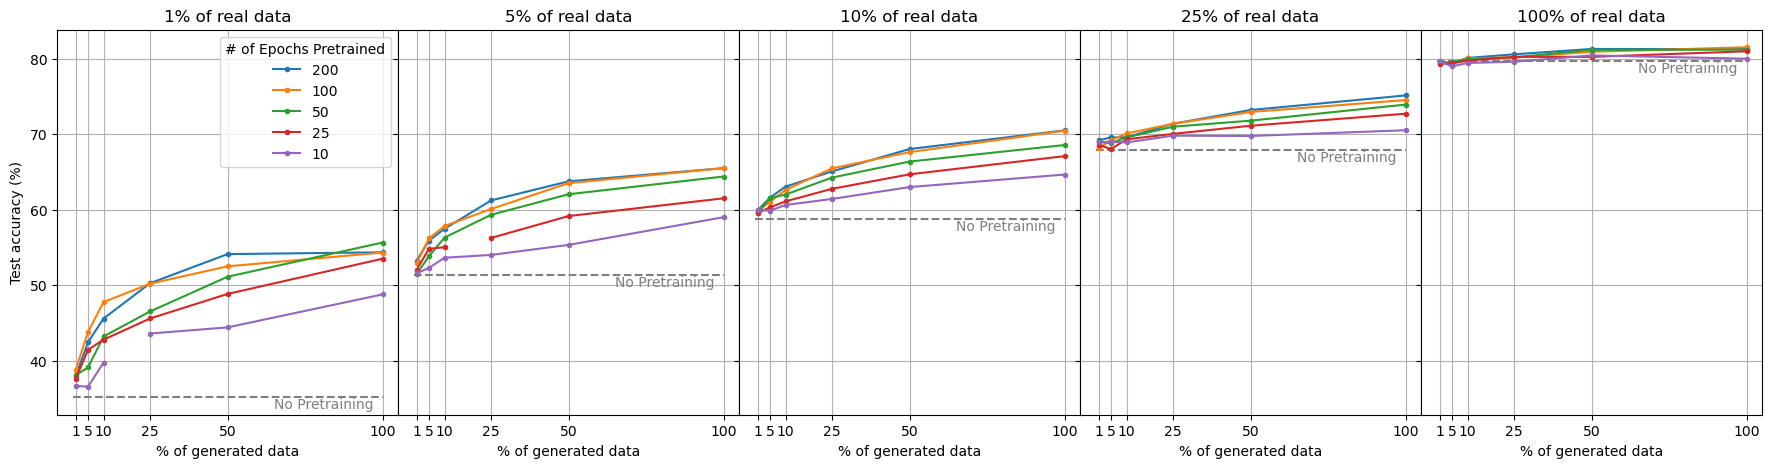

In [43]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

real_datas = data["real_data"].unique()
num_epochs_pre = data["num_epochs_pre"].unique()
num_epochs_pre = -np.sort(-num_epochs_pre)
real_datas.sort()

fig, ax = plt.subplots(1, 5, sharey=True, )
fig.set_figheight(5)
fig.set_figwidth(22)
# fig.tight_layout()

loc = [[0,0], [0,1], [1,0], [1,1]]
baselines = [0.3515, 0.5128, 0.5872, 0.6785, 0.7972]

for x, real in enumerate(real_datas):
    for epoch in num_epochs_pre:
        if np.isnan(epoch):
            continue
        _data = data[(data["real_data"] == real) & (data["num_epochs_pre"] == epoch)]
        
        # _data = pd.concat([_base, _data])
        _data = _data.sort_values(by="gen_data")
        _ax = ax[x]
        _ax.plot(_data["gen_data"], _data["test_acc"]*100, '.-', label=int(epoch))
        
        _ax.grid()
        _ax.set_xticks(_data["gen_data"].unique())
        # _ax.set_scale("log")
        _ax.set_xticklabels([f"{x*100:.0f}" for x in _data["gen_data"].unique()])
        # _ax.xaxis.set_major_formatter(ScalarFormatter())
   
        if x == 0:
            _ax.set_ylabel("Test accuracy (%)")
            _ax.legend(title="# of Epochs Pretrained")
        _ax.set_xlabel("% of generated data")
        _ax.set_title(f"{real*100:.0f}% of real data")
    # _base = data[(data["real_data"] == real) & (data["gen_data"] == 0)]
    _ax.hlines(baselines[x]*100, 0, 1, colors="tab:grey", linestyles="dashed")
    _ax.text(x=0.65, y=(baselines[x]*100) - 1.5, s="No Pretraining", c="tab:grey")
# fig.legend(num_epochs_pre, title="num_epochs_pre")

plt.subplots_adjust(wspace=0.0)

# CIFAR100 - Multi - RS34

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("cifar100_MD_results.csv")
data = data[["num_epochs_pre", "gen_data", "real_data", "test_acc"]]

print("Corrolation of each variable with regards to test accuracy")
data.corr()["test_acc"][0:-1]


Corrolation of each variable with regards to test accuracy


num_epochs_pre    0.003076
gen_data          0.124639
real_data         0.892362
Name: test_acc, dtype: float64

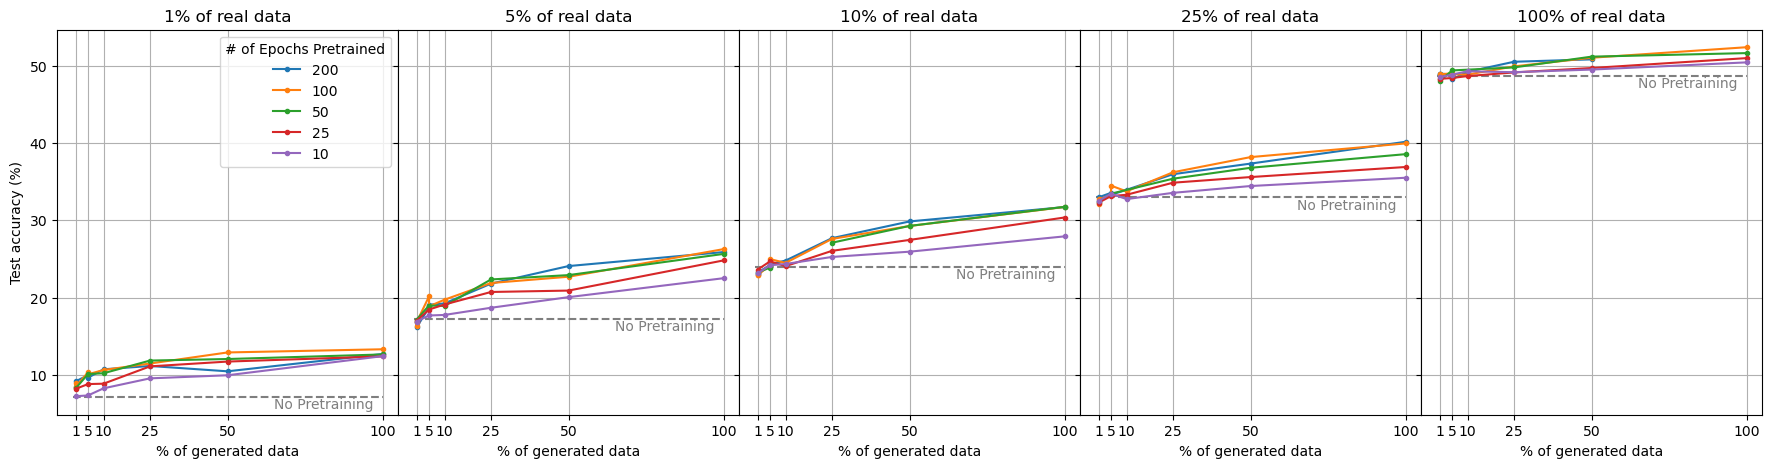

In [55]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

real_datas = data["real_data"].unique()
num_epochs_pre = data["num_epochs_pre"].unique()
num_epochs_pre = -np.sort(-num_epochs_pre)
real_datas.sort()

fig, ax = plt.subplots(1, 5, sharey=True, )
fig.set_figheight(5)
fig.set_figwidth(22)
# fig.tight_layout()

loc = [[0,0], [0,1], [1,0], [1,1]]
baselines = [0.0711, 0.1728, 0.2399, 0.3294, 0.4866]

for x, real in enumerate(real_datas):
    for epoch in num_epochs_pre:
        if np.isnan(epoch):
            continue
        _data = data[(data["real_data"] == real) & (data["num_epochs_pre"] == epoch)]
        
        # _data = pd.concat([_base, _data])
        _data = _data.sort_values(by="gen_data")
        _ax = ax[x]
        _ax.plot(_data["gen_data"], _data["test_acc"]*100, '.-', label=int(epoch))
        
        _ax.grid()
        _ax.set_xticks(_data["gen_data"].unique())
        # _ax.set_scale("log")
        _ax.set_xticklabels([f"{x*100:.0f}" for x in _data["gen_data"].unique()])
        # _ax.xaxis.set_major_formatter(ScalarFormatter())
   
        if x == 0:
            _ax.set_ylabel("Test accuracy (%)")
            _ax.legend(title="# of Epochs Pretrained")
        _ax.set_xlabel("% of generated data")
        _ax.set_title(f"{real*100:.0f}% of real data")
    # _base = data[(data["real_data"] == real) & (data["gen_data"] == 0)]
    _ax.hlines(baselines[x]*100, 0, 1, colors="tab:grey", linestyles="dashed")
    _ax.text(x=0.65, y=(baselines[x]*100) - 1.5, s="No Pretraining", c="tab:grey")
# fig.legend(num_epochs_pre, title="num_epochs_pre")

plt.subplots_adjust(wspace=0.0)

# Cifar10 - Multi - MBV3

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("cifar10_base_mbv3.csv")
data = data[["num_epochs_pre", "gen_data", "real_data", "test_acc"]]

print("Corrolation of each variable with regards to test accuracy")
data.corr()["test_acc"][0:-1]


Corrolation of each variable with regards to test accuracy


num_epochs_pre    0.110866
gen_data          0.265222
real_data         0.788202
Name: test_acc, dtype: float64

In [8]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

real_datas = data["real_data"].unique()
num_epochs_pre = data["num_epochs_pre"].unique()
num_epochs_pre = -np.sort(-num_epochs_pre)
real_datas.sort()

fig, ax = plt.subplots(1, 5, sharey=True, )
fig.set_figheight(5)
fig.set_figwidth(22)
# fig.tight_layout()

for x, real in enumerate(real_datas):
    for epoch in num_epochs_pre:
        if np.isnan(epoch):
            continue
        _data = data[(data["real_data"] == real) & (data["num_epochs_pre"] == epoch)]
        
        # _data = pd.concat([_base, _data])
        _data = _data.sort_values(by="gen_data")
        _ax = ax[x]
        _ax.plot(_data["gen_data"], _data["test_acc"]*100, '.-', label=int(epoch))
        
        _ax.grid()
        _ax.set_xticks(_data["gen_data"].unique())
        # _ax.set_scale("log")
        _ax.set_xticklabels([f"{x*100:.0f}" for x in _data["gen_data"].unique()])
        # _ax.xaxis.set_major_formatter(ScalarFormatter())
   
        if x == 0:
            _ax.set_ylabel("Test accuracy (%)")
            _ax.legend(title="# of Epochs Pretrained")
        _ax.set_xlabel("% of generated data")
        _ax.set_title(f"{real*100:.0f}% of real data")
    _base = data[(data["real_data"] == real) & (data["gen_data"] == 0)]
    _ax.hlines(_base["test_acc"]*100, 0, 1, colors="tab:grey")
# fig.legend(num_epochs_pre, title="num_epochs_pre")

plt.subplots_adjust(wspace=0.0)

# CIFAR100 - Base - RS34

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("cifar100_base_rs34.csv")
data = data[["num_epochs_pre", "gen_data", "real_data", "test_acc"]]

print("Corrolation of each variable with regards to test accuracy")
data.corr()["test_acc"][0:-1]

Corrolation of each variable with regards to test accuracy


num_epochs_pre    0.038737
gen_data          0.163787
real_data         0.852605
Name: test_acc, dtype: float64

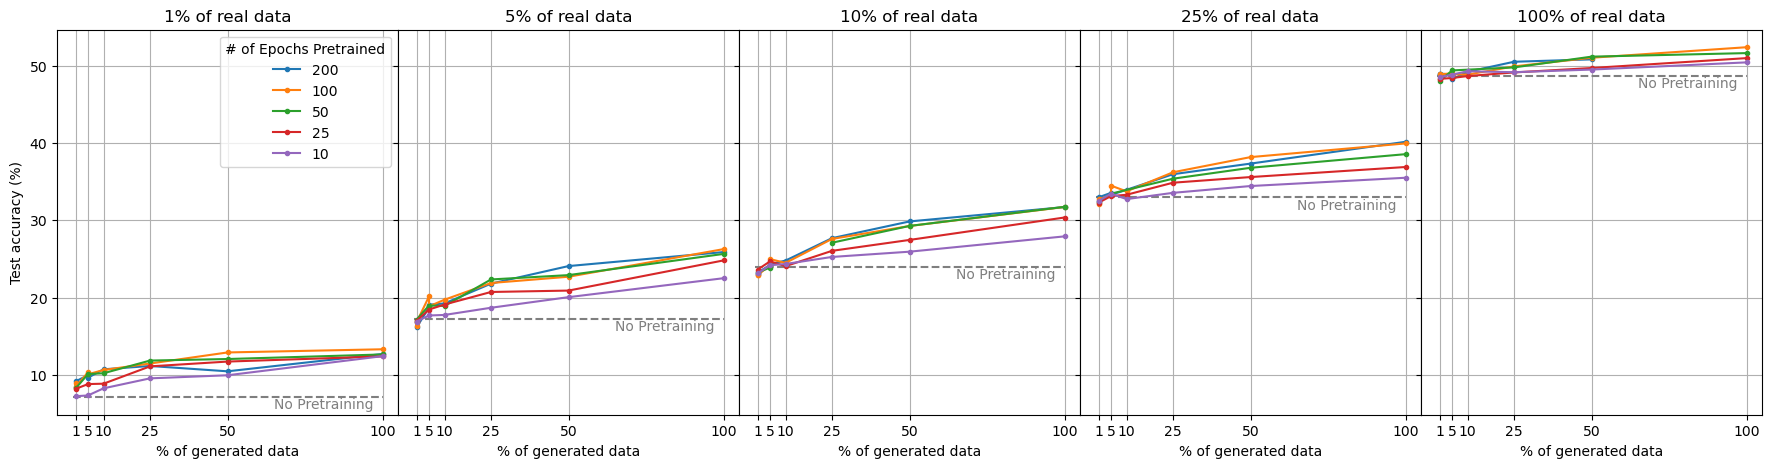

In [56]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

real_datas = data["real_data"].unique()
num_epochs_pre = data["num_epochs_pre"].unique()
num_epochs_pre = -np.sort(-num_epochs_pre)
real_datas.sort()

fig, ax = plt.subplots(1, 5, sharey=True, )
fig.set_figheight(5)
fig.set_figwidth(22)
# fig.tight_layout()

loc = [[0,0], [0,1], [1,0], [1,1]]
baselines = [0.0711, 0.1728, 0.2399, 0.3294, 0.4866]

for x, real in enumerate(real_datas):
    for epoch in num_epochs_pre:
        if np.isnan(epoch):
            continue
        _data = data[(data["real_data"] == real) & (data["num_epochs_pre"] == epoch)]
        
        # _data = pd.concat([_base, _data])
        _data = _data.sort_values(by="gen_data")
        _ax = ax[x]
        _ax.plot(_data["gen_data"], _data["test_acc"]*100, '.-', label=int(epoch))
        
        _ax.grid()
        _ax.set_xticks(_data["gen_data"].unique())
        # _ax.set_scale("log")
        _ax.set_xticklabels([f"{x*100:.0f}" for x in _data["gen_data"].unique()])
        # _ax.xaxis.set_major_formatter(ScalarFormatter())
   
        if x == 0:
            _ax.set_ylabel("Test accuracy (%)")
            _ax.legend(title="# of Epochs Pretrained")
        _ax.set_xlabel("% of generated data")
        _ax.set_title(f"{real*100:.0f}% of real data")
    # _base = data[(data["real_data"] == real) & (data["gen_data"] == 0)]
    _ax.hlines(baselines[x]*100, 0, 1, colors="tab:grey", linestyles="dashed")
    _ax.text(x=0.65, y=(baselines[x]*100) - 1.5, s="No Pretraining", c="tab:grey")
# fig.legend(num_epochs_pre, title="num_epochs_pre")

plt.subplots_adjust(wspace=0.0)

# Cifar100 - Multi - ViT-B

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("cifar100_multi_vitb.csv")
data = data[["num_epochs_pre", "gen_data", "real_data", "test_acc"]]

print("Corrolation of each variable with regards to test accuracy")
data.corr()["test_acc"][0:-1]

Corrolation of each variable with regards to test accuracy


num_epochs_pre   -0.070029
gen_data          0.137046
real_data         0.687624
Name: test_acc, dtype: float64

In [6]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

real_datas = data["real_data"].unique()
num_epochs_pre = data["num_epochs_pre"].unique()
num_epochs_pre = -np.sort(-num_epochs_pre)
real_datas.sort()

fig, ax = plt.subplots(1, 5, sharey=True, )
fig.set_figheight(5)
fig.set_figwidth(22)
# fig.tight_layout()

for x, real in enumerate(real_datas):
    for epoch in num_epochs_pre:
        if np.isnan(epoch):
            continue
        _data = data[(data["real_data"] == real) & (data["num_epochs_pre"] == epoch)]
        
        # _data = pd.concat([_base, _data])
        _data = _data.sort_values(by="gen_data")
        _ax = ax[x]
        _ax.plot(_data["gen_data"], _data["test_acc"]*100, '.-', label=int(epoch))
        
        _ax.grid()
        _ax.set_xticks(_data["gen_data"].unique())
        # _ax.set_scale("log")
        _ax.set_xticklabels([f"{x*100:.0f}" for x in _data["gen_data"].unique()])
        # _ax.xaxis.set_major_formatter(ScalarFormatter())
   
        if x == 0:
            _ax.set_ylabel("Test accuracy (%)")
            _ax.legend(title="# of Epochs Pretrained")
        _ax.set_xlabel("% of generated data")
        _ax.set_title(f"{real*100:.0f}% of real data")
    _base = data[(data["real_data"] == real) & (data["gen_data"] == 0)]
    _ax.hlines(_base["test_acc"]*100, 0, 1, colors="tab:grey")
# fig.legend(num_epochs_pre, title="num_epochs_pre")

plt.subplots_adjust(wspace=0.0)